# Project 4

**Consumer Personal Loan Approval Prediction**

>**Using EDA and Various Machine Learning Algorithms**

>**And Comparing the Accuracy of Different Algorithms**

**The major aim of this project is to predict which of the customers will have their loan paid or not. Therefore, this is a supervised classification problem.**

>**Cleaning the data and performing EDA.**

In [15]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
#Importing the Dataset
df_train = pd.read_excel('Project - 4 - Train Data.xlsx')
df_test = pd.read_excel('Project - 4 - Test Data.xlsx')

In [17]:
df_train.shape

(614, 20)

In [18]:
df_test.shape

(367, 19)

In [19]:
df_train.head()

,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,INT_ID,Prev_ID,AGT_ID,CPL_Status
0,CPL001002,M,N,Austin,Pennycook,apennycook1@mac.com,007 Miller Road,0,Grad,N,7018.8,0.0,NaN,360.0,1.0,Urban,9694176212,92-247-0058,Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-TW...,Y
1,CPL001003,M,Y,Mareah,Tomanek,mtomanek2@bloomberg.com,145 Charing Cross Junction,1,Grad,N,5499.6,1809.6,153.6,360.0,1.0,Rural,152387684,36-236-3028,Mozilla/5.0 (Windows NT 5.1; rv:21.0) Gecko/20...,N
2,CPL001005,M,Y,Myrna,Rosenthaler,mrosenthaler3@dmoz.org,268 Algoma Hill,0,Grad,Y,3600.0,0.0,79.2,360.0,1.0,Urban,6510396556,34-339-0917,Mozilla/5.0 (Windows; U; Windows NT 6.1; cs-CZ...,Y
3,CPL001006,M,Y,Danyette,Stempe,dstempe4@tumblr.com,571 Stone Corner Park,0,Non Grad,N,3099.6,2829.6,144.0,360.0,1.0,Urban,7141853006,94-098-8902,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_2_1 li...,Y
4,CPL001008,M,N,Patten,McCathy,pmccathy5@ted.com,118 Moulton Drive,0,Grad,N,7200.0,0.0,169.2,360.0,1.0,Urban,23293411,38-247-1410,Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKi...,Y


**Read the data and checked the shape. It has 614 rows and 20 columns. That’s 19 features**

### Missing Values: Check where there are missing values and fix them appropriately.

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loanapp_ID      614 non-null    object 
 1   Sex             601 non-null    object 
 2   Marital_Status  611 non-null    object 
 3   first_name      614 non-null    object 
 4   last_name       614 non-null    object 
 5   email           614 non-null    object 
 6   address         614 non-null    object 
 7   Dependents      599 non-null    object 
 8   Qual_var        614 non-null    object 
 9   SE              582 non-null    object 
 10  App_Income_1    614 non-null    float64
 11  App_Income_2    614 non-null    float64
 12  CPL_Amount      612 non-null    float64
 13  CPL_Term        600 non-null    float64
 14  Credit_His      564 non-null    float64
 15  Prop_Area       614 non-null    object 
 16  INT_ID          614 non-null    int64  
 17  Prev_ID         614 non-null    obj

### Observations:
1. We can see there are total 20 columns including target variable, all of them are self explanatory.
2. We also see some missing values.

**To get a better understanding, Let's Calculate the percentage of Missing Values**

In [21]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total' , 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_His,50,0.081433
SE,32,0.052117
Dependents,15,0.024430
CPL_Term,14,0.022801
Sex,13,0.021173
Marital_Status,3,0.004886
CPL_Amount,2,0.003257
first_name,0,0.000000
last_name,0,0.000000
email,0,0.000000


**Conclusion:** Variable: Credit_His, SE, Dependents, CPL_Term, Sex, Marital_Status and CPL_Amount have missing values.

### Fill missing values

In [22]:
#Handling the Missing Values
df_train['Sex'] = df_train['Sex'].fillna(df_train['Sex'].dropna().mode().values[0] )
df_train['Marital_Status'] = df_train['Marital_Status'].fillna(df_train['Marital_Status'].dropna().mode().values[0] )
df_train['Dependents'] = df_train['Dependents'].fillna(df_train['Dependents'].dropna().mode().values[0] )
df_train['SE'] = df_train['SE'].fillna(df_train['SE'].dropna().mode().values[0] )
df_train['CPL_Amount'] = df_train['CPL_Amount'].fillna(df_train['CPL_Amount'].dropna().median() )
df_train['CPL_Term'] = df_train['CPL_Term'].fillna(df_train['CPL_Term'].dropna().mode().values[0] )
df_train['Credit_His'] = df_train['Credit_His'].fillna(df_train['Credit_His'].dropna().mode().values[0] )

In [23]:
#Confirming whether all missing values are properly handled
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total' , 'Percent'])
missing_data.head(20)

,Total,Percent
CPL_Status,0,0.0
AGT_ID,0,0.0
Sex,0,0.0
Marital_Status,0,0.0
first_name,0,0.0
last_name,0,0.0
email,0,0.0
address,0,0.0
Dependents,0,0.0
Qual_var,0,0.0


**Conclusion:-** 

We can observe that the variables that contained the missing values, no longer contain any Missing Value. So, all the missing values are skillfully treated.


### Before proceeding further to EDA, it's good practice to drop the useless columns.

In [24]:
 #Dropping Useless Columns
df_train = df_train.drop(columns=['Loanapp_ID', 'Prev_ID', 'INT_ID', 'AGT_ID', 'first_name', 'last_name', 'email', 'address'  ])

In [25]:
#Verifying that columns have been dropped.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             614 non-null    object 
 1   Marital_Status  614 non-null    object 
 2   Dependents      614 non-null    object 
 3   Qual_var        614 non-null    object 
 4   SE              614 non-null    object 
 5   App_Income_1    614 non-null    float64
 6   App_Income_2    614 non-null    float64
 7   CPL_Amount      614 non-null    float64
 8   CPL_Term        614 non-null    float64
 9   Credit_His      614 non-null    float64
 10  Prop_Area       614 non-null    object 
 11  CPL_Status      614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


### Exploratory Data Analysis(EDA):

Showing the power of Visualizations

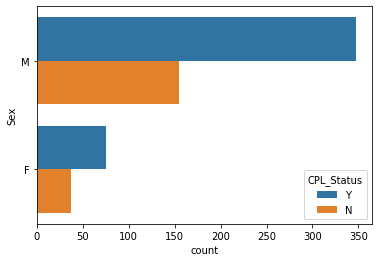

In [26]:
sns.countplot(y = 'Sex', hue = 'CPL_Status', data = df_train)

**Observation:-** More males are on loan than females.

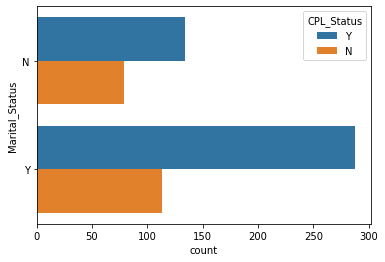

In [27]:
sns.countplot(y = 'Marital_Status', hue = 'CPL_Status', data = df_train)

**Observation:-** Married people collect more loan than unmarried.

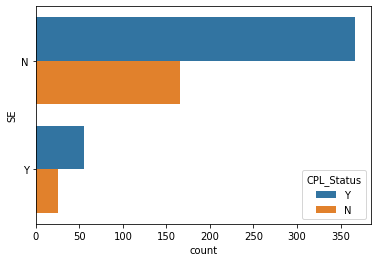

In [28]:
sns.countplot(y = 'SE', hue = 'CPL_Status', data = df_train)

**Observation:-** The category of those that take loans is less of self-employed people. That’s those are not self-employed probably salalary earners obtain more loan.


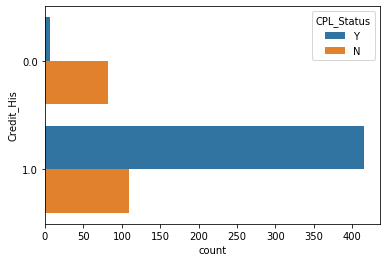

In [29]:
sns.countplot(y = 'Credit_His', hue = 'CPL_Status', data = df_train)

**Observations:-** Applicant with credit history are far more likely to be accepted.

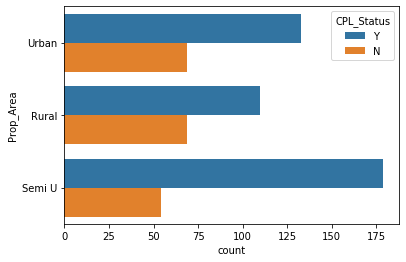

In [30]:
sns.countplot(y = 'Prop_Area', hue = 'CPL_Status', data = df_train)

**Observations:-** Semiurban obtain more loan, folowed by Urban and then rural.

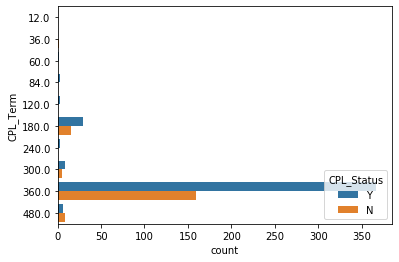

In [31]:
sns.countplot(y = 'CPL_Term', hue = 'CPL_Status', data = df_train)

**Observation:-** An extremely high number of them go for a 360 cyclic loan term. That’s pay back within a year

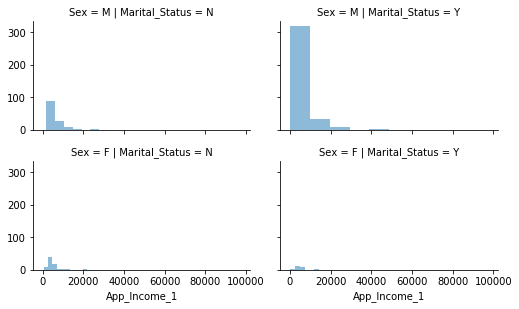

In [32]:
grid = sns.FacetGrid(df_train, row = 'Sex', col = 'Marital_Status', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'App_Income_1', alpha = .5, bins = 10)
grid.add_legend()

**Observation:-** Males generally have the highest income. Explicitly, Males that are married have greater income that unmarried male.

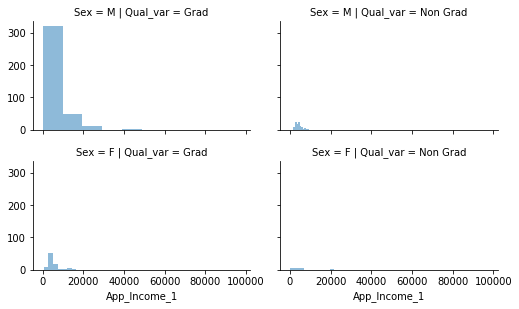

In [33]:
grid = sns.FacetGrid(df_train, row = 'Sex', col = 'Qual_var', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'App_Income_1', alpha = .5, bins = 10)
grid.add_legend()

**Observation:-** A graduate who is a male has more income.

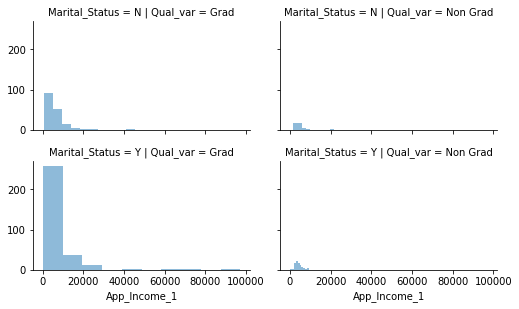

In [34]:
grid = sns.FacetGrid(df_train, row = 'Marital_Status', col = 'Qual_var', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'App_Income_1', alpha = .5, bins = 10)
grid.add_legend()

**Observation:-** A graduate and married individual has more income.

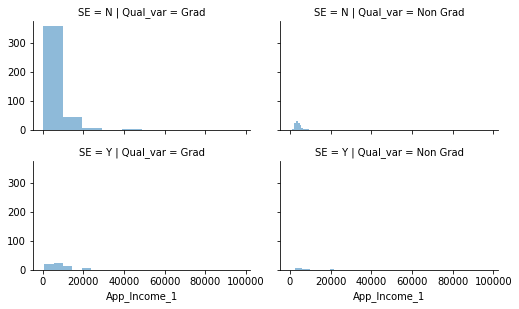

In [35]:
grid = sns.FacetGrid(df_train, row = 'SE', col = 'Qual_var', height = 2.2, aspect = 1.6)
grid.map(plt.hist, 'App_Income_1', alpha = .5, bins = 10)
grid.add_legend()

**Observation:-** A graduate but not self-employed has more income.

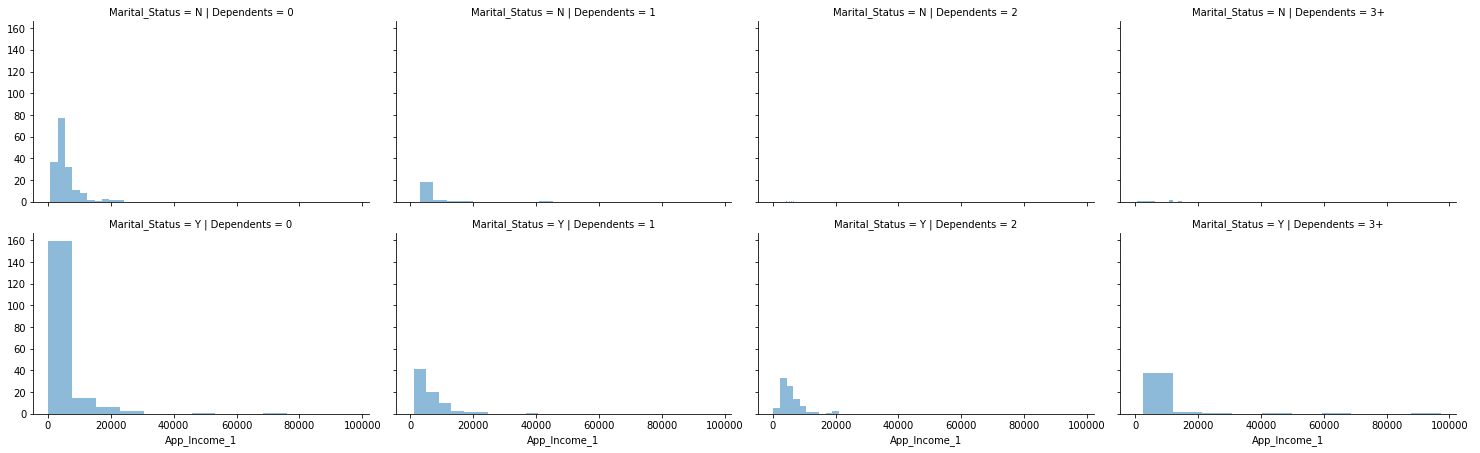

In [36]:
grid = sns.FacetGrid(df_train, row = 'Marital_Status', col = 'Dependents', height = 3.2, aspect = 1.6)
grid.map(plt.hist, 'App_Income_1', alpha = .5, bins = 10)
grid.add_legend()

**Observation:-** Not married and no one is dependent on such has more income. Also, Married and no one dependent has greater income with a decreasing effect as the dependents increases

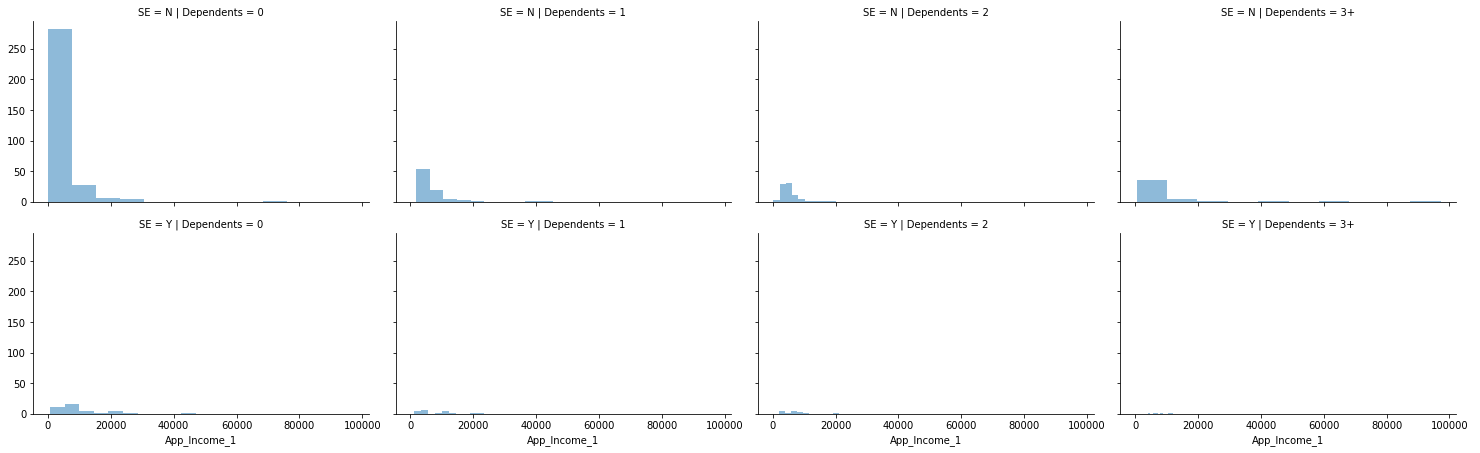

In [37]:
grid = sns.FacetGrid(df_train, row = 'SE', col = 'Dependents', height = 3.2, aspect = 1.6)
grid.map(plt.hist, 'App_Income_1', alpha = .5, bins = 10)
grid.add_legend()

**Observation:-** No one is dependent and self-employed has more income.

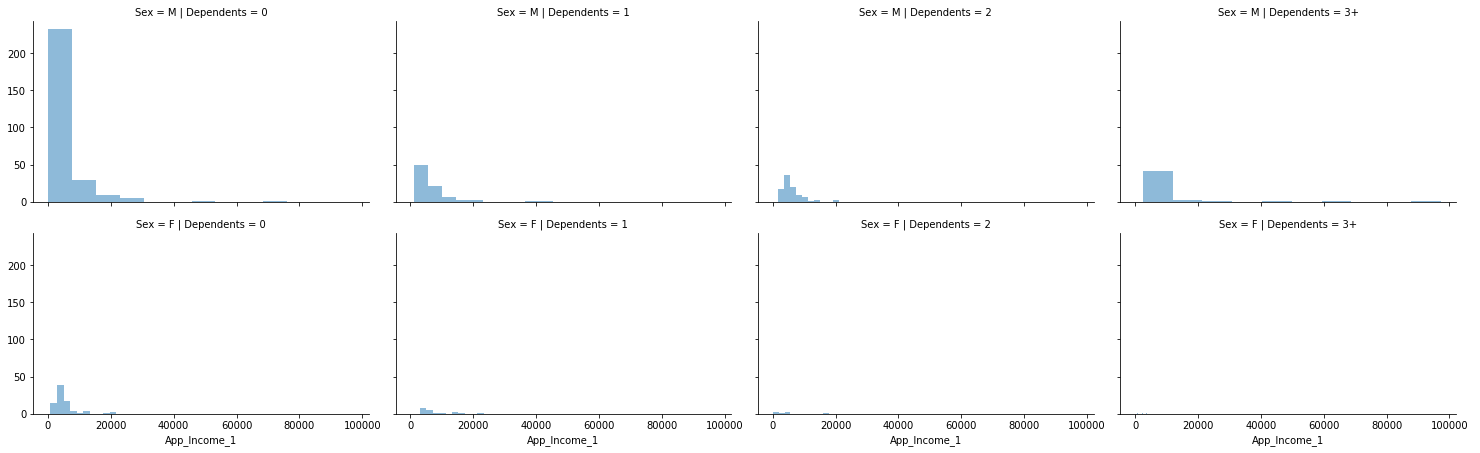

In [38]:
grid = sns.FacetGrid(df_train, row = 'Sex', col = 'Dependents', height = 3.2, aspect = 1.6)
grid.map(plt.hist, 'App_Income_1', alpha = .5, bins = 10)
grid.add_legend()

**Observation:-** No one is dependent and a male tremendously has more income.

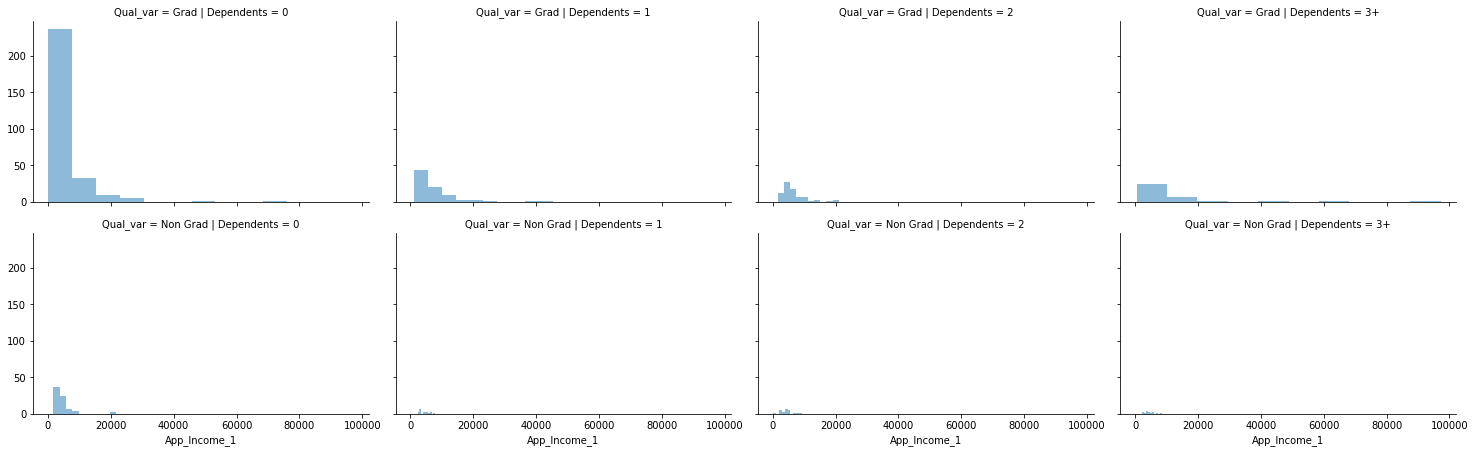

In [39]:
grid = sns.FacetGrid(df_train, row = 'Qual_var', col = 'Dependents', height = 3.2, aspect = 1.6)
grid.map(plt.hist, 'App_Income_1', alpha = .5, bins = 10)
grid.add_legend()

**Observation:-** A graduate with no one dependent has more income.

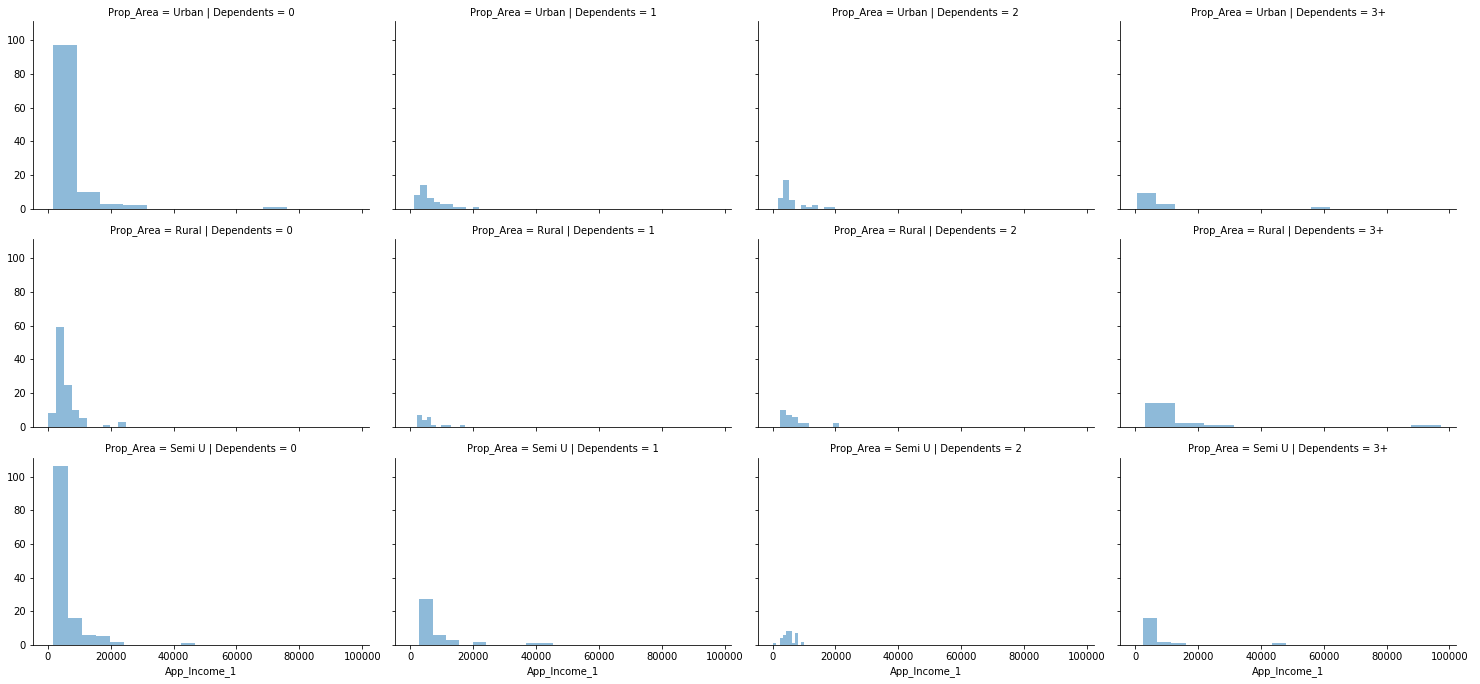

In [40]:
grid = sns.FacetGrid(df_train, row = 'Prop_Area', col = 'Dependents', height = 3.2, aspect = 1.6)
grid.map(plt.hist, 'App_Income_1', alpha = .5, bins = 10)
grid.add_legend()

**Observation:-** No one is dependent and have property in urban, rural and semiurban has more income

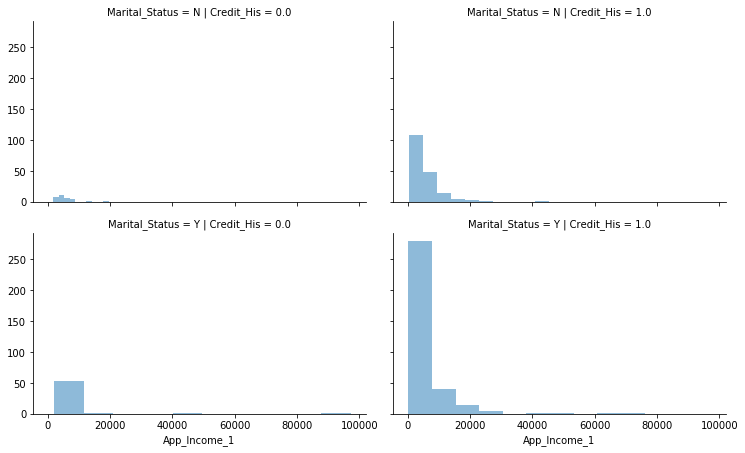

In [41]:
grid = sns.FacetGrid(df_train, row = 'Marital_Status', col = 'Credit_His', height = 3.2, aspect = 1.6)
grid.map(plt.hist, 'App_Income_1', alpha = .5, bins = 10)
grid.add_legend()

**Observation:-** Married and has a good credit history depicts more income. Also, Not married but has a good credit history follows in the hierarchy.

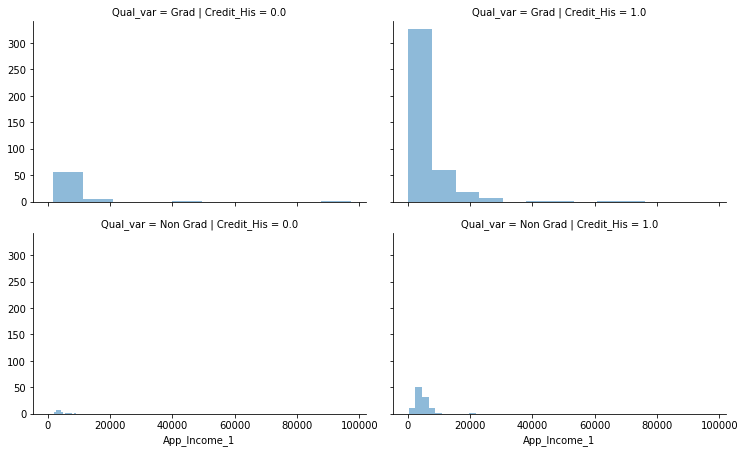

In [42]:
grid = sns.FacetGrid(df_train, row = 'Qual_var', col = 'Credit_His', height = 3.2, aspect = 1.6)
grid.map(plt.hist, 'App_Income_1', alpha = .5, bins = 10)
grid.add_legend()

**Observation:-** Educated with good credit history depicts a good income. Also, not a graduate and have a good credit history can be traced to having a better income than a fellow with no degree.

### Encoding to numeric data: 

In [43]:
code_numeric = {'M': 1, 'F': 2, 'Y': 1, 'N': 2, 'Grad': 1, 'Non Grad': 2, 'Urban': 3, 'Semi U': 2, 'Rural': 1, 'Y': 1, 'N': 0, '3+': 3}
df_train = df_train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
df_test = df_test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             614 non-null    int64  
 1   Marital_Status  614 non-null    int64  
 2   Dependents      614 non-null    int64  
 3   Qual_var        614 non-null    int64  
 4   SE              614 non-null    int64  
 5   App_Income_1    614 non-null    float64
 6   App_Income_2    614 non-null    float64
 7   CPL_Amount      614 non-null    float64
 8   CPL_Term        614 non-null    float64
 9   Credit_His      614 non-null    float64
 10  Prop_Area       614 non-null    int64  
 11  CPL_Status      614 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 57.7 KB


**Conclusion:-** We can see that all the object columns are converted to integer types.

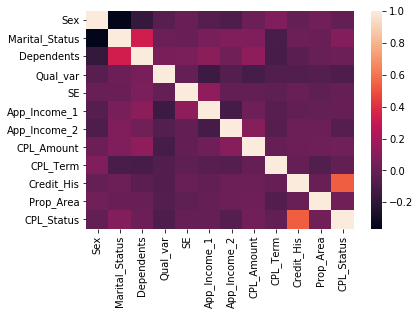

In [45]:
sns.heatmap(df_train.corr())

**Observations from HeatMap:-** Showing the correlations of features with the target. No correlations are extremely high. The correlations between LoanAmount and ApplicantIncome can be explained.

### Preprocessing Data:
-> Input data needs to be pre-processed before we feed it to model. Following things need to be taken care:

1. Encoding Categorical Features.
2. Inputing missing values

In [46]:
# Encoding categrical Features:
train_df_encoded = pd.get_dummies(df_train,drop_first=True)
train_df_encoded.head()

,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status
0,1,0,0,1,0,7018.8,0.0,153.6,360.0,1.0,3,1
1,1,1,1,1,0,5499.6,1809.6,153.6,360.0,1.0,1,0
2,1,1,0,1,1,3600.0,0.0,79.2,360.0,1.0,3,1
3,1,1,0,2,0,3099.6,2829.6,144.0,360.0,1.0,3,1
4,1,0,0,1,0,7200.0,0.0,169.2,360.0,1.0,3,1


In [47]:
########## Split Features and Target Varible ############
X = train_df_encoded.drop(columns='CPL_Status')
y = train_df_encoded['CPL_Status']

################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)
############### Handling/Imputing Missing values #############
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)


## Implementing ML Models:- 

### Model 1:- Decision Tree Classifier 

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score


tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6074873206858501
Validation Mean Accuracy:  0.6681302824159967


> ### Overfitting Problem
**We can see from above metrics that Training Accuracy > Test Accuracy with default settings of Decision Tree classifier. Hence, model is overfit. We will try some Hyper-parameter tuning and see if it helps.**

> First let's try tuning 'Max_Depth' of tree


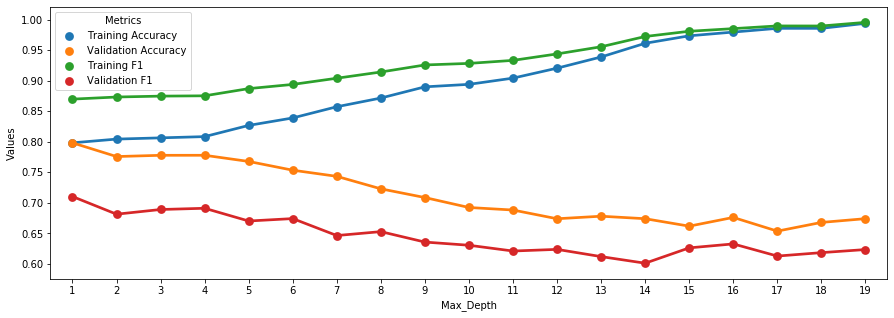

In [49]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

**Observation:-** From above graph, we can conclude that keeping 'Max_Depth' = 3 will yield optimum Test accuracy and F1 score Optimum Test Accuracy ~ 0.805; Optimum F1 Score: ~0.7

**Visulazing Decision Tree with Max Depth = 3**

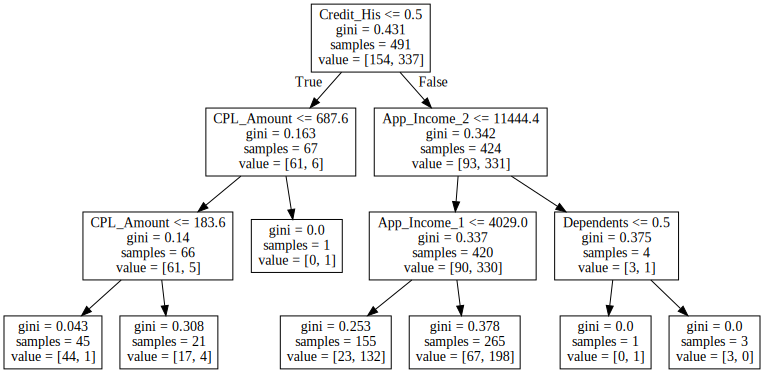

In [50]:
#importing path of graphviz module
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/shash/.conda/pkgs/graphviz-2.38-hfd603c8_2/Library/bin/graphviz'
#Creating Decision tree with MAX_DEPTH = 3
import graphviz 
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(X_train,y_train)
dot_data = tree.export_graphviz(tree_clf,feature_names = X.columns.tolist())
graph = graphviz.Source(dot_data)
graph

**Observation:-** From above tree, we could see that some of the leafs have less than 5 samples hence our classifier might overfit. We can sweep hyper-parameter 'min_samples_leaf' to further improve test accuracy by keeping max_depth to 3

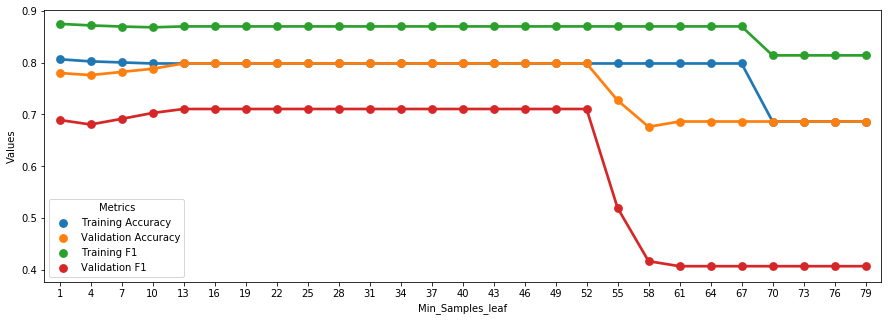

In [51]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
min_samples_leaf = []
import numpy as np
for samples_leaf in range(1,80,3): ### Sweeping from 1% samples to 10% samples per leaf 
    tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

**Observation:-** From above plot, we will choose Min_Samples_leaf to 35 to improve test accuracy.

We can use this Decision Tree classifier on unseen test data and evaluate Test Accuracy, F1 Score and Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8536585365853658
Test F1 Score:  0.903225806451613
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,21,17,38
1,1,84,85
All,22,101,123


### Model 2:- Random Forest Classifier 

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100,max_depth=3,min_samples_leaf = 10)
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_train)
print("Train F1 Score ", f1_score(y_train,y_pred))
print("Train Accuracy ", accuracy_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(rf_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Train F1 Score  0.8699080157687253
Train Accuracy  0.7983706720977597
Validation Mean F1 Score:  0.7105036634489533
Validation Mean Accuracy:  0.7983714698000413


**Random Forest: Test Data Evaluation**

In [54]:
y_pred = rf_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8536585365853658
Test F1 Score:  0.903225806451613
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,21,17,38
1,1,84,85
All,22,101,123


**Observations:-** Random Forest gives same results as Decision Tree Classifier. Finally, we will try Logistic Regression Model by sweeping threshold values.

### Model 3:- Logistic Regression

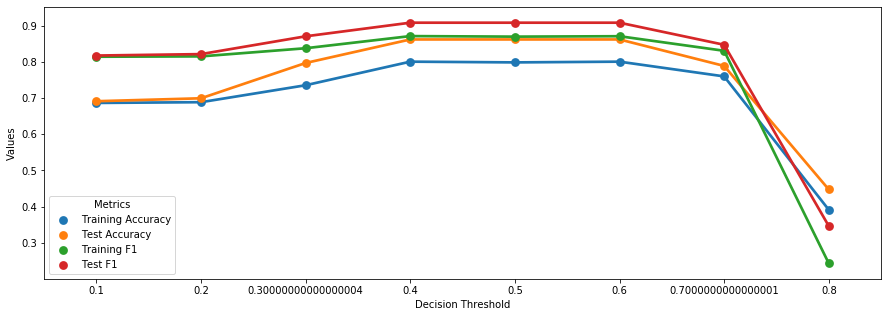

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

#for thresh in np.linspace(0.1,0.9,8): ## Sweeping from threshold of 0.1 to 0.9
for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    logreg_clf = LogisticRegression(solver='liblinear')
    logreg_clf.fit(X_train,y_train)
    
    y_pred_train_thresh = logreg_clf.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)
    
    y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
    
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

**Observation:-** 
1. Logistic Regression does slightly better than Decision Tree and Random Forest.
2. Based on the above Test/Train curves, we can keep threshold to 0.4.

**Logistic Regression Confusion Matrix**

In [56]:
thresh = 0.4 ### Threshold chosen from above Curves
y_pred_test_thresh = logreg_clf.predict_proba(X_test_imp)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8617886178861789
Test F1 Score:  0.9081081081081082
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,22,16,38
1,1,84,85
All,23,100,123


# Final Observation:-

### Logistic Regression Confusion matrix is very similar to Decision Tree and Random Forest Classifier. 
### Still Logistic Regression Confusion matrix gives somewhat better accuracy than the other two models. 
### In this analysis, we did extensive analysis of input data and were able to achieve Test Accuracy of 86 %.